***Feature scaling --- Standardlization** 

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv('scaling_dataset.csv')
dataset

,ID,Age,Annual_Income (USD),Spending_Score (1-100),Savings (USD)
0,1,19,15000,39,2000
1,2,21,18000,81,500
2,3,20,16000,6,1200
3,4,23,24000,77,300
4,5,31,30000,40,1500
5,6,22,25000,76,400
6,7,35,50000,6,8000
7,8,23,22000,94,700
8,9,64,60000,3,20000
9,10,30,52000,73,9500


In [29]:
#check have null value or not
dataset.isnull().sum() 
#if here available is null value then the fill it with mean in perticuller column

ID                        0
Age                       0
Annual_Income (USD)       0
Spending_Score (1-100)    0
Savings (USD)             0
dtype: int64

In [30]:
#if here Spending_Score (1-100) and Savings (USD)two column have some null value then
dataset['Savings (USD)'].fillna(dataset['Savings (USD)'].mean(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\2654953206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Savings (USD)'].fillna(dataset['Savings (USD)'].mean(),inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\3065183161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Savings (USD)'])


<Axes: xlabel='Savings (USD)', ylabel='Density'>

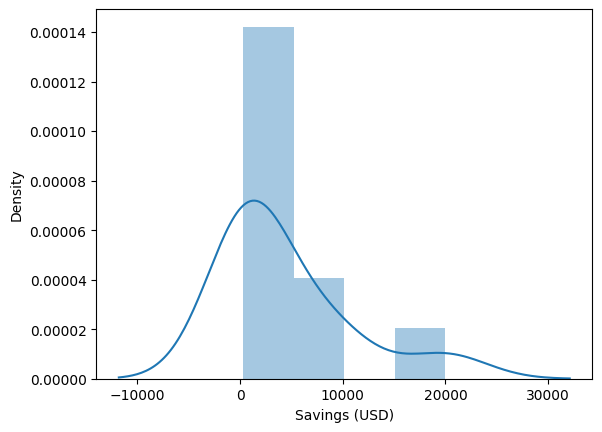

In [31]:
sns.distplot(dataset['Savings (USD)'])

In [32]:
dataset.describe()

,ID,Age,Annual_Income (USD),Spending_Score (1-100),Savings (USD)
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,28.800000,31200.000000,49.500000,4410.000000
std,3.02765,13.464356,16531.451506,35.167062,6398.341799
min,1.00000,19.000000,15000.000000,3.000000,300.000000
25%,3.25000,21.250000,19000.000000,14.250000,550.000000
50%,5.50000,23.000000,24500.000000,56.500000,1350.000000
75%,7.75000,30.750000,45000.000000,76.750000,6500.000000
max,10.00000,64.000000,60000.000000,94.000000,20000.000000


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
#firstly we are fit the data and then transform
ss = StandardScaler()
ss.fit(dataset[['Savings (USD)']])

StandardScaler()

In [35]:
ss.transform(dataset[['Savings (USD)']])

array([[-0.3970346 ],
       [-0.64415157],
       [-0.52883031],
       [-0.67710049],
       [-0.47940692],
       [-0.66062603],
       [ 0.59143328],
       [-0.61120264],
       [ 2.56836903],
       [ 0.83855025]])

In [36]:
#we can also use this 
ss.fit_transform(dataset[["Savings (USD)"]])

array([[-0.3970346 ],
       [-0.64415157],
       [-0.52883031],
       [-0.67710049],
       [-0.47940692],
       [-0.66062603],
       [ 0.59143328],
       [-0.61120264],
       [ 2.56836903],
       [ 0.83855025]])

In [37]:
dataset['Savings (USD)_ss'] = pd.DataFrame(ss.fit_transform(dataset[["Savings (USD)"]]))
dataset 

,ID,Age,Annual_Income (USD),Spending_Score (1-100),Savings (USD),Savings (USD)_ss
0,1,19,15000,39,2000,-0.397035
1,2,21,18000,81,500,-0.644152
2,3,20,16000,6,1200,-0.528830
3,4,23,24000,77,300,-0.677100
4,5,31,30000,40,1500,-0.479407
5,6,22,25000,76,400,-0.660626
6,7,35,50000,6,8000,0.591433
7,8,23,22000,94,700,-0.611203
8,9,64,60000,3,20000,2.568369
9,10,30,52000,73,9500,0.838550


In [38]:
dataset.describe()

,ID,Age,Annual_Income (USD),Spending_Score (1-100),Savings (USD),Savings (USD)_ss
count,10.00000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,5.50000,28.800000,31200.000000,49.500000,4410.000000,-1.110223e-17
std,3.02765,13.464356,16531.451506,35.167062,6398.341799,1.054093e+00
min,1.00000,19.000000,15000.000000,3.000000,300.000000,-6.771005e-01
25%,3.25000,21.250000,19000.000000,14.250000,550.000000,-6.359143e-01
50%,5.50000,23.000000,24500.000000,56.500000,1350.000000,-5.041186e-01
75%,7.75000,30.750000,45000.000000,76.750000,6500.000000,3.443163e-01
max,10.00000,64.000000,60000.000000,94.000000,20000.000000,2.568369e+00


C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\337798116.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Savings (USD)'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_10312\337798116.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Savings (USD)_ss'])


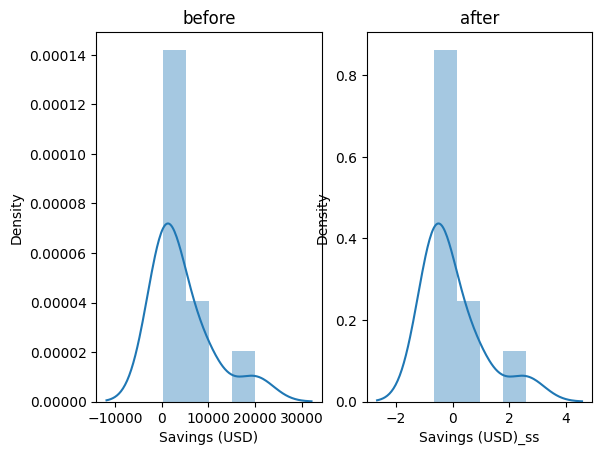

In [43]:
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(dataset['Savings (USD)'])

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(dataset['Savings (USD)_ss'])
plt.show()